In [1]:
import pandas as pd
import numpy as np
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
X_train = pd.read_table('train/X_train.txt', delim_whitespace=True, header = None)
Y_train = pd.read_table('train/y_train.txt', delim_whitespace=True, header = None)
X_test = pd.read_table('test/X_test.txt', delim_whitespace=True, header = None)
Y_test = pd.read_table('test/y_test.txt', delim_whitespace=True, header = None)

In [14]:
X_train.shape

(7352, 561)

In [3]:
np.sort(Y_train[0].unique())

array([1, 2, 3, 4, 5, 6])

In [4]:
rfc = ensemble.RandomForestClassifier()

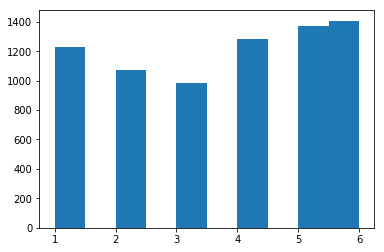

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: 0, dtype: int64

In [5]:
plt.hist(Y_train[0])
plt.show()
Y_train[0].value_counts()

In [6]:
class1index = Y_train[Y_train[0] == 1].sample(986).index.tolist()
class2index = Y_train[Y_train[0] == 2].sample(986).index.tolist()
class3index = Y_train[Y_train[0] == 3].sample(986).index.tolist()
class4index = Y_train[Y_train[0] == 4].sample(986).index.tolist()
class5index = Y_train[Y_train[0] == 5].sample(986).index.tolist()
class6index = Y_train[Y_train[0] == 6].sample(986).index.tolist()

In [7]:
class1index.extend(class2index)
class1index.extend(class3index)
class1index.extend(class4index)
class1index.extend(class5index)
class1index.extend(class6index)

In [8]:
balaced_X_train = X_train.iloc[class1index]
balaced_Y_train = Y_train.iloc[class1index]

In [9]:
rfc.fit(balaced_X_train, balaced_Y_train[0])
Y_ = rfc.predict(X_test)
accuracy_score(Y_test, Y_)

0.90736342042755347

In [10]:
print(classification_report(Y_test, Y_))

             precision    recall  f1-score   support

          1       0.87      0.96      0.91       496
          2       0.87      0.87      0.87       471
          3       0.92      0.82      0.87       420
          4       0.87      0.90      0.89       491
          5       0.91      0.88      0.89       532
          6       1.00      1.00      1.00       537

avg / total       0.91      0.91      0.91      2947



In [11]:
confusion_matrix(Y_test, Y_)

array([[475,   8,  13,   0,   0,   0],
       [ 45, 410,  16,   0,   0,   0],
       [ 24,  52, 344,   0,   0,   0],
       [  0,   0,   0, 443,  48,   0],
       [  0,   0,   0,  66, 466,   0],
       [  0,   0,   0,   1,   0, 536]])